 # Exploratory Data Analysis on Superstore Data
 ## Author- Yashika Paneri

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
SuperStoreData = pd.read_csv("SampleSuperstore.csv")
Initial_Shape = SuperStoreData.shape
Initial_Shape

(9994, 13)

In [3]:
SuperStoreData.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
SuperStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


No null-valued cells present.

In [5]:
SuperStoreData.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
SuperStoreData.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
SuperStoreData.duplicated().sum()

17

In [8]:
SuperStoreData.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
#Deleting Identicle rows to reduce noise from the data
SuperStoreData.drop_duplicates(keep= 'first',inplace=True) 

In [10]:
SuperStoreData

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
#Final Shape of the dataframe
Final_Shape = SuperStoreData.shape
Final_Shape

(9977, 13)

In [12]:
# Initial number of rows vs final
Initial_Shape[0]- Final_Shape[0]

17

## Exploratory Data Analysis and Visulization 

In [13]:
Sales_and_Profits = SuperStoreData.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2) # Rounding Numericala entries to 2 decimal places

Sales     2296195.59
Profit     286241.42
dtype: float64

#### Total Sales = 2,296,195.56 USD
#### Total Profits = 286,241.42 USD

In [14]:
Top_10_Sales = SuperStoreData.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = SuperStoreData.groupby("State").Profit.sum().nlargest(n =10)

In [15]:
Top_10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [16]:
Top_10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

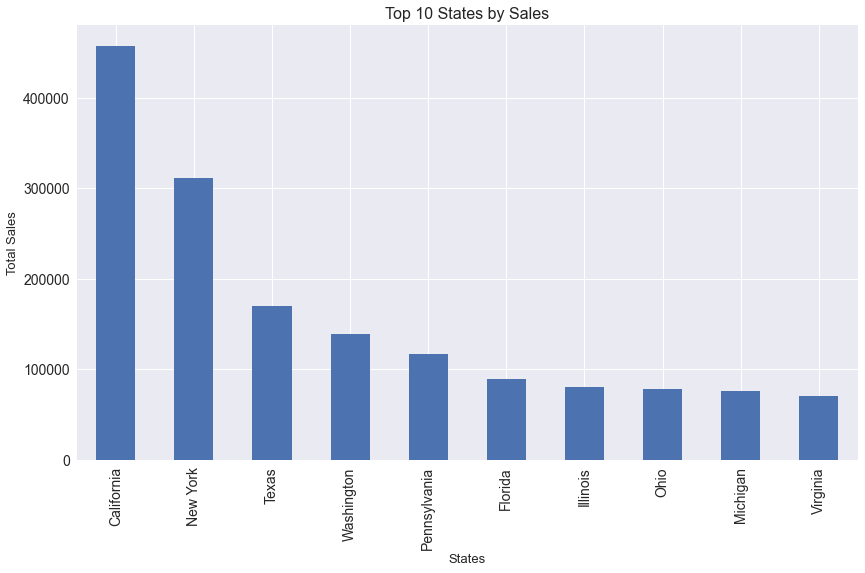

In [17]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

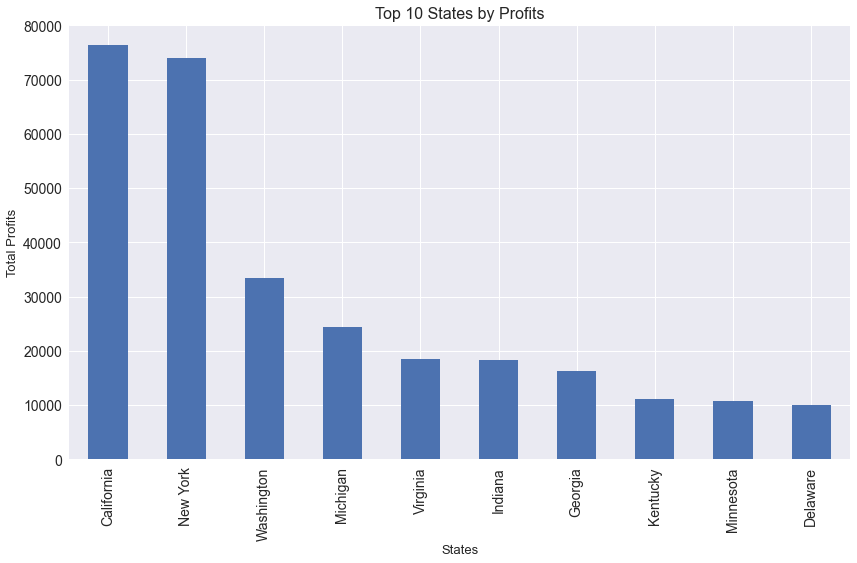

In [18]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

#### California and New York are far ahead of their competitor states.

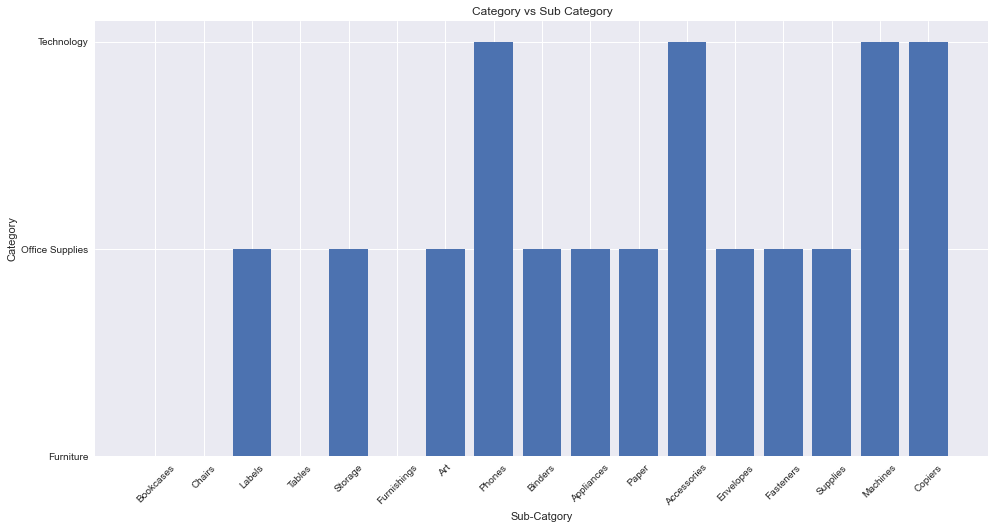

In [19]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=SuperStoreData)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

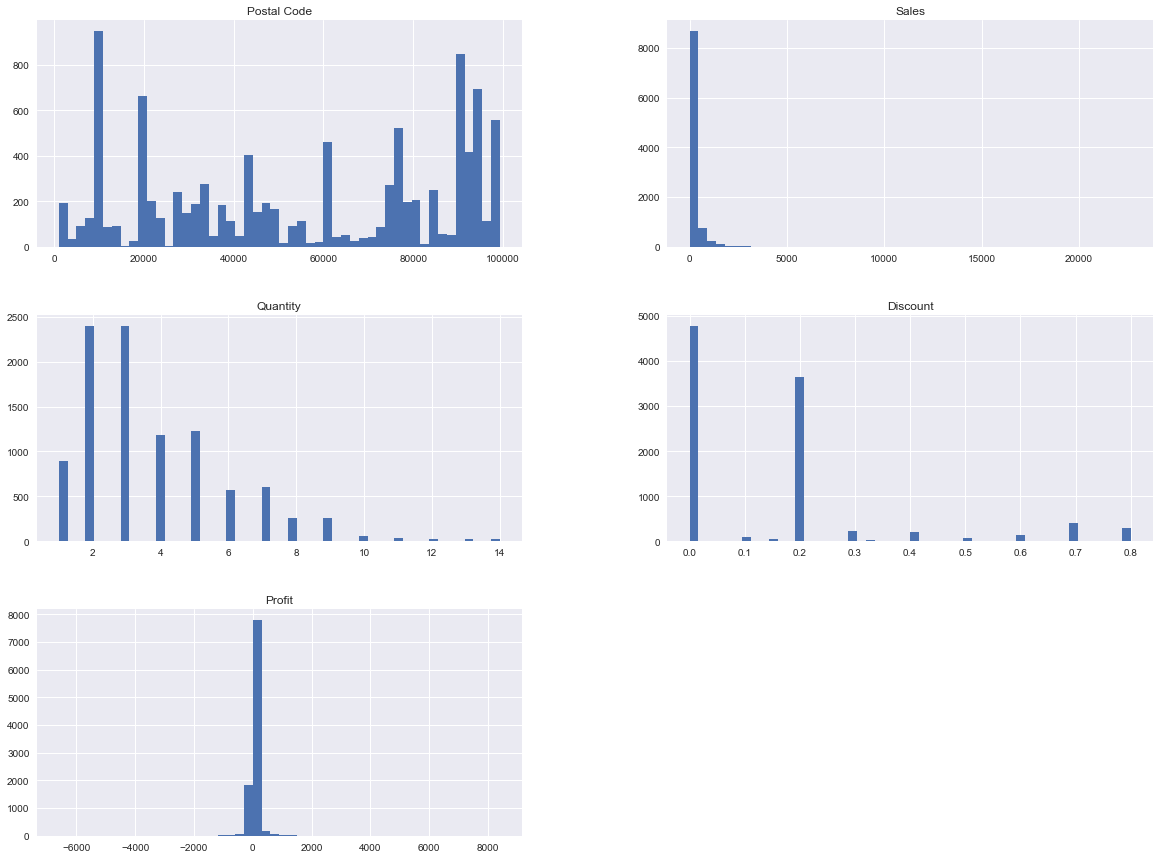

In [20]:
SuperStoreData.hist(bins=50 ,figsize=(20,15))
plt.show();

In [21]:
SuperStoreData['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

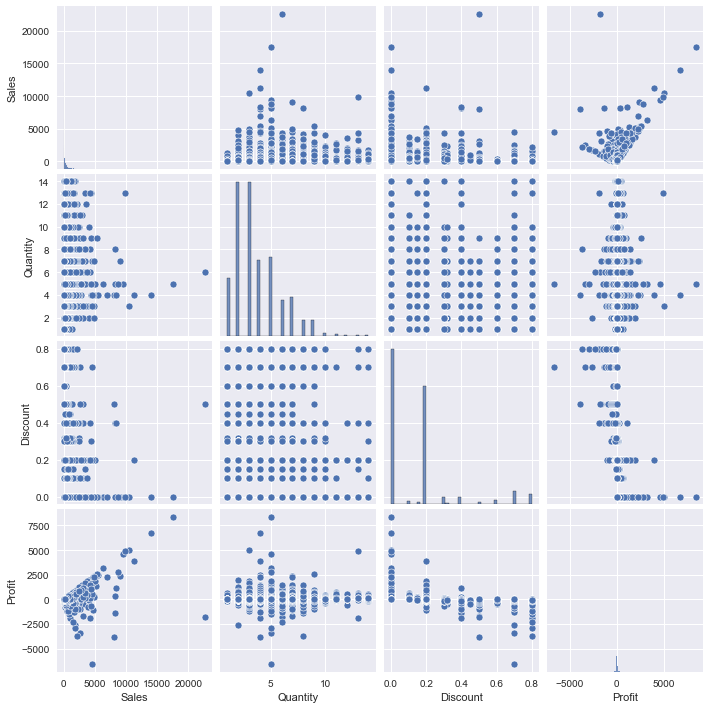

In [22]:
# Pair_plot
financial=SuperStoreData.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

In above we see that there is some relation between sales and profit and also there is some relation between Discount and Profit. Now To see what exact relation between those entities we plot the heat_map. so we get more clearity

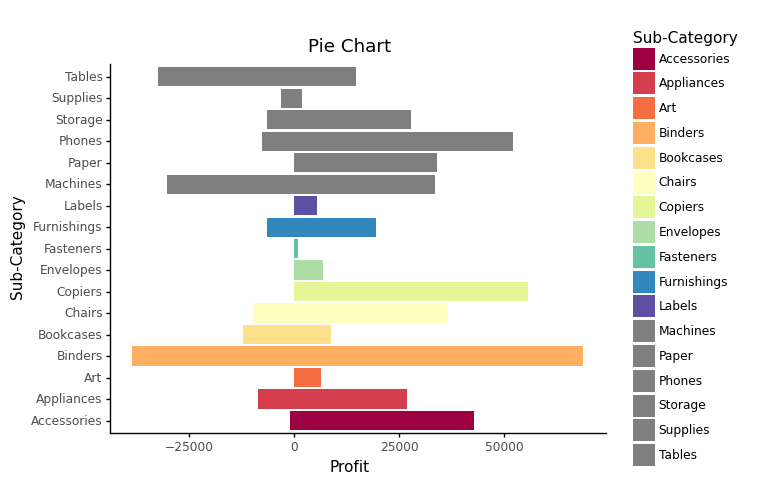

<ggplot: (141007227886)>

In [25]:
Profit_plot = (ggplot(SuperStoreData, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

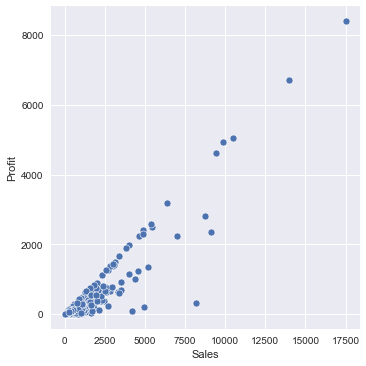

In [26]:
data=SuperStoreData[SuperStoreData['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

Hence we say that there positive relation between Profit and sales.when Discount is 0 Now we plot heat_map to get correlaton

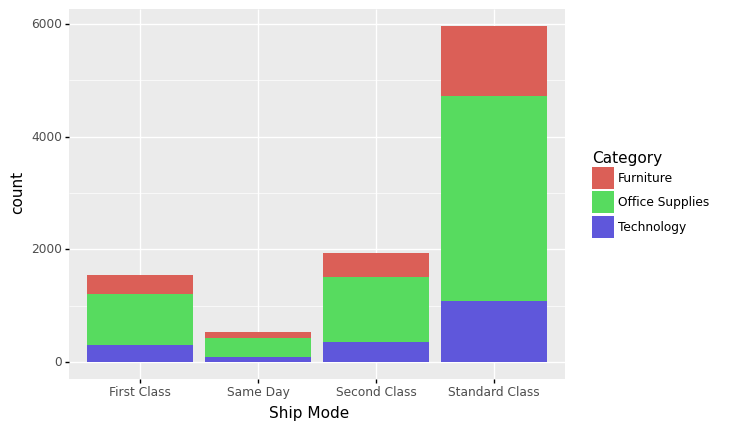

<ggplot: (141008804485)>

In [27]:
ggplot(SuperStoreData, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

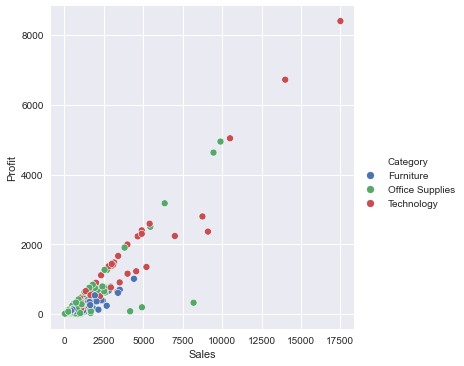

In [28]:
#Rel_plot with respect category
sns.relplot(x='Sales',y='Profit',hue='Category',data=data)

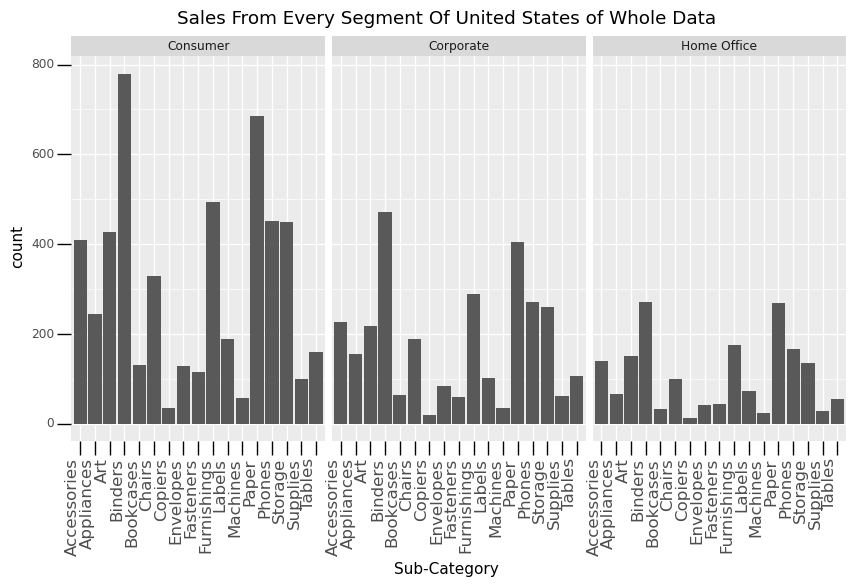

<ggplot: (141009409666)>

In [29]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(SuperStoreData, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

<AxesSubplot:xlabel='Category', ylabel='Profit'>

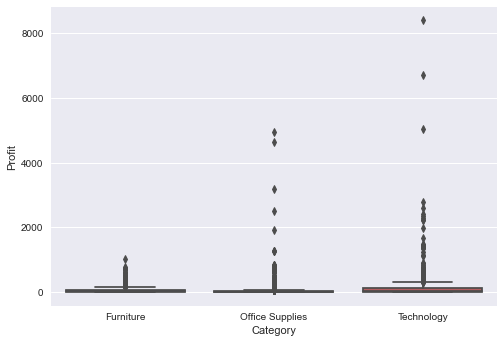

In [30]:
sns.boxplot(x='Category',y='Profit',data=data)

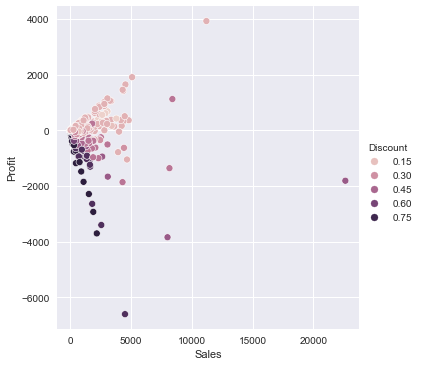

In [31]:
data1=SuperStoreData[SuperStoreData['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data1)

In above graph we see that as percentages of Discount increses the sales is also goes increses but profit goes decreases

Now we check how it can be effects on different sectors of businesses

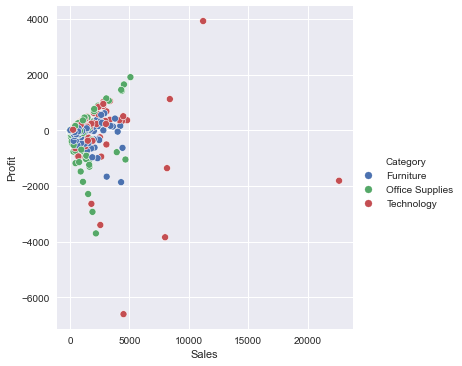

In [32]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=data1)

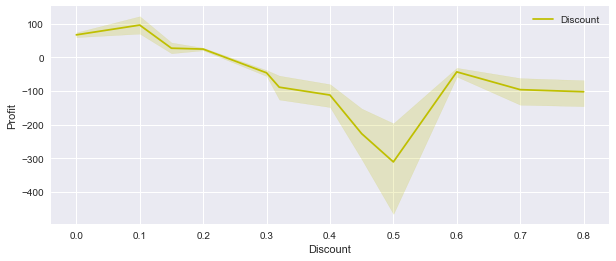

In [33]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=SuperStoreData , color='y',label='Discount')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Sub-Category'>

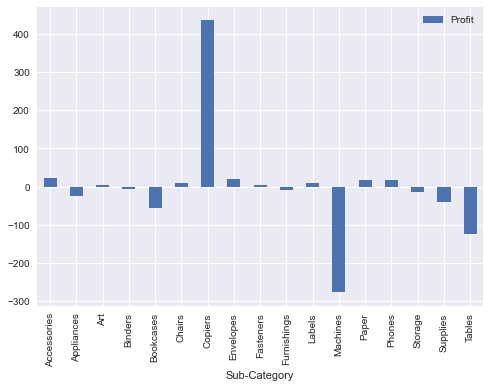

In [34]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

Here we see that copiers had highest Profit and Machines had highest loss

<AxesSubplot:xlabel='Sub-Category'>

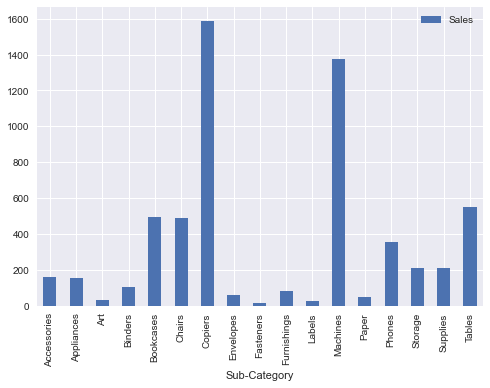

In [35]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

Here we see that copiers had highest sale and Machines had second highest sales

In above two graph we see that 'Machines' had second highest sale but due to large discount it is in loss and in second graph we see that sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses

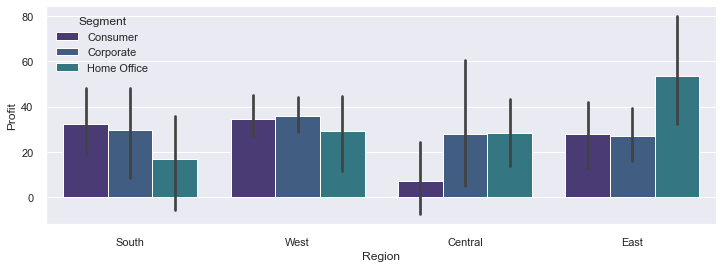

In [36]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = SuperStoreData , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

In [37]:
# Grouping Data by Region and only slicing Data for Central Region from whole Data Set
gb_Central = list(SuperStoreData.groupby("Region"))[0][1]

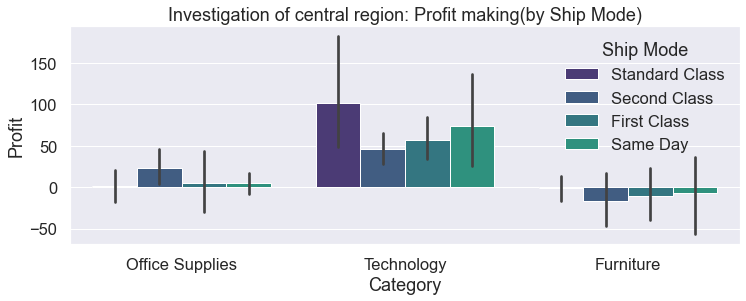

In [38]:
# Investing Further in cenral Region 
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

#### Losses are inccured in Furniture Cateory irrespective to ship mode in Central Region

In [39]:
# Slicing Furniture Data from whole data set
gb_Category_Furniture =list(list(SuperStoreData.groupby("Region"))[0][1].groupby("Category"))[0][1]

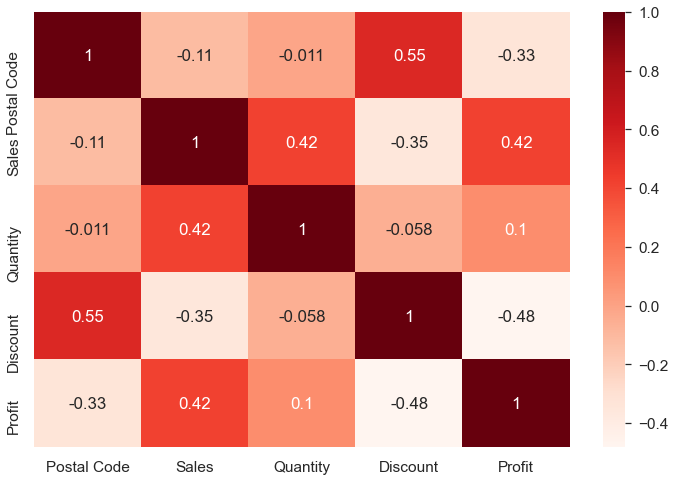

In [40]:
# Correlation matrix Heat Map to identify key factors influening profits
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="Reds")
plt.show()

#### There is unusually high positive correlation between Postal Code and Discount
#### Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values... i.e. they are not helping in improving sales of "Furniture" category of the company

<Figure size 864x576 with 0 Axes>

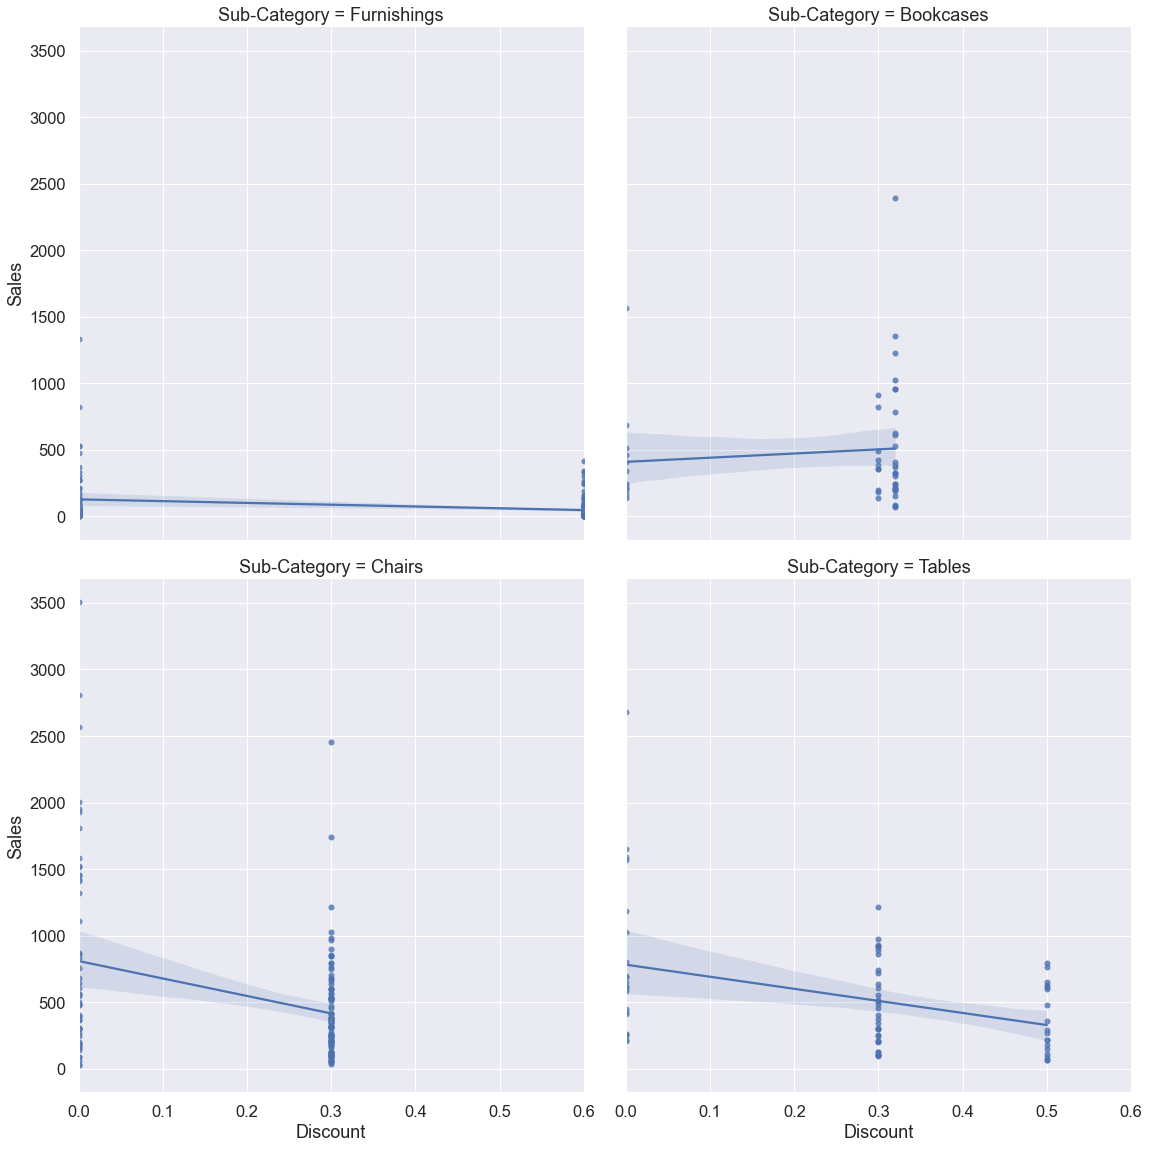

In [41]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

### Some more insights regarding Distribution of data 

<AxesSubplot:xlabel='Category', ylabel='Profit'>

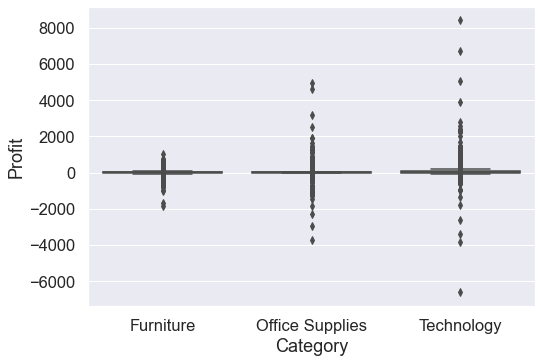

In [42]:
# box plot
sns.boxplot(x='Category',y='Profit',data=SuperStoreData)

we see that variation in Technology sector is more as compared to other two sector

<AxesSubplot:xlabel='Category'>

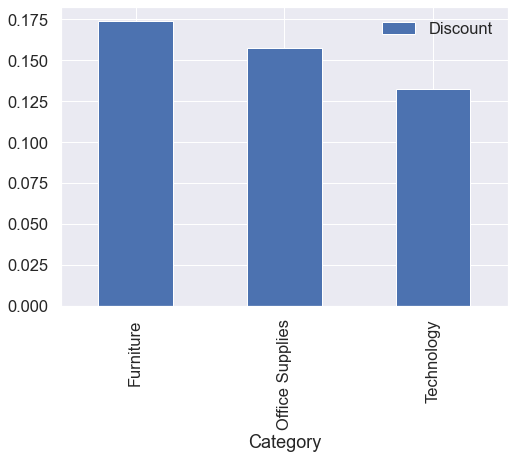

In [43]:
pivot=pd.pivot_table(SuperStoreData,index='Category',values='Discount')
pivot.plot(kind='bar')

## Conclusion

### From All these analysis we finally conclude that, 

##### 1) Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.
##### 2) We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City. 
##### 3) For enhancing the profits , we need to sell more to the states which are liking our products¶ like NEWYORK and CALIFORNIA .
##### 4) If we give more Discount on products our sales goes increses but Profit get down.
##### 5) In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount.
##### 6) Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses.
##### 7) To rise the profits , we first need to sell consumer segment products more .

#### From the Above data Visualization and Clustering we can see that in Which states and in which Category Sales and profits are High or less,We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.So For Deciding that Range we have to do some Technical Analysis.One can Do it through Factor Analysis,or also can Do it throgh neural networks.

**One thing to be noted is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business**